# **Object Recognition and Object Counting using Image Processing.**

Original Image



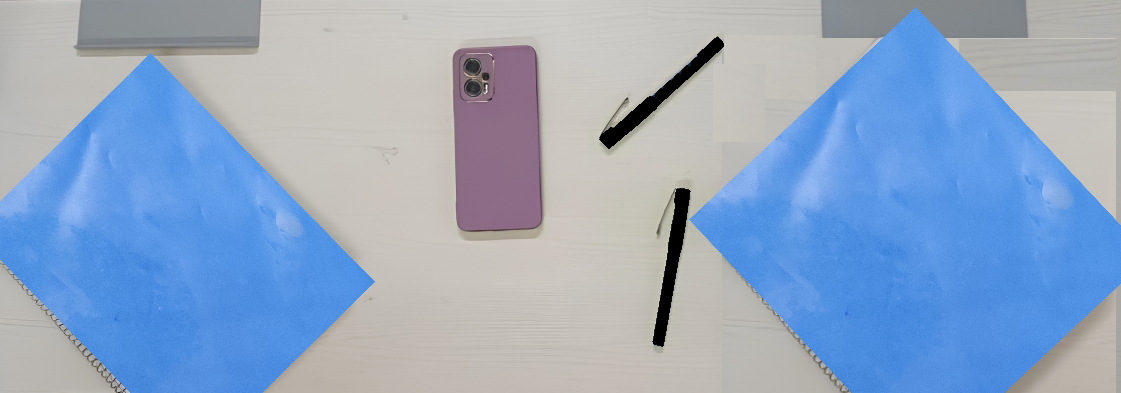

In [100]:
#Importing Libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('image.png')

# Display Image
print("Original Image\n")
cv2_imshow(image)


##**Phone Detection**

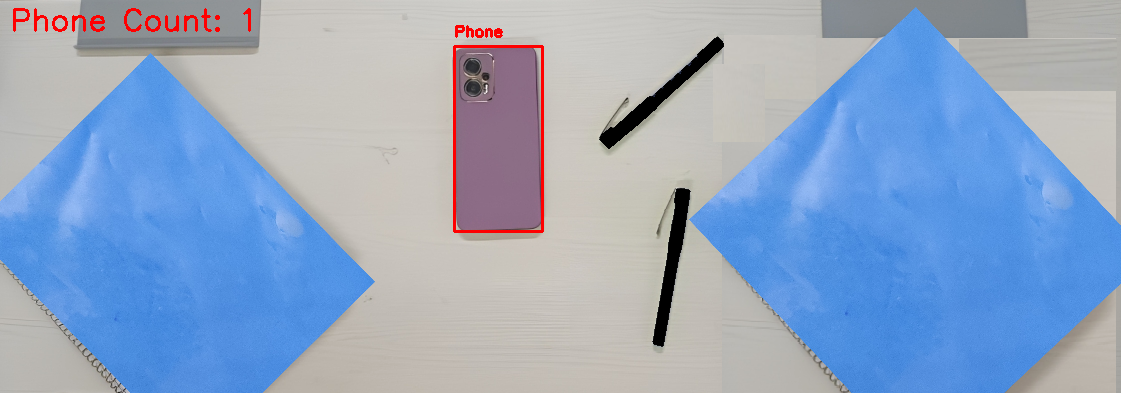

In [101]:
# Load the image
image = cv2.imread('image.png')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges for the phone
lower_phone = np.array([145, 50, 50])
upper_phone = np.array([175, 255, 255])

# Create a mask for the phone based on the color range
mask_phone = cv2.inRange(hsv_image, lower_phone, upper_phone)

# Apply morphological operations to enhance phone detection
kernel = np.ones((5, 5), np.uint8)
mask_phone = cv2.morphologyEx(mask_phone, cv2.MORPH_OPEN, kernel)

# Find contours in the phone mask
contours_phone, _ = cv2.findContours(mask_phone, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a count for detected phones
phone_count = 0

# Initialize a list to store labels for detected phones
phone_labels = []

# Draw bounding boxes around the detected phones and label them
for contour in contours_phone:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    if cv2.contourArea(contour) > 200 and aspect_ratio < 3:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        label = "Phone"
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        phone_labels.append(label)
        phone_count += 1

# Display the count of detected phones and image with bounding boxes
cv2.putText(image, f"Phone Count: {phone_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(image)


cv2.waitKey(0)
cv2.destroyAllWindows()


## **Pen Detection**

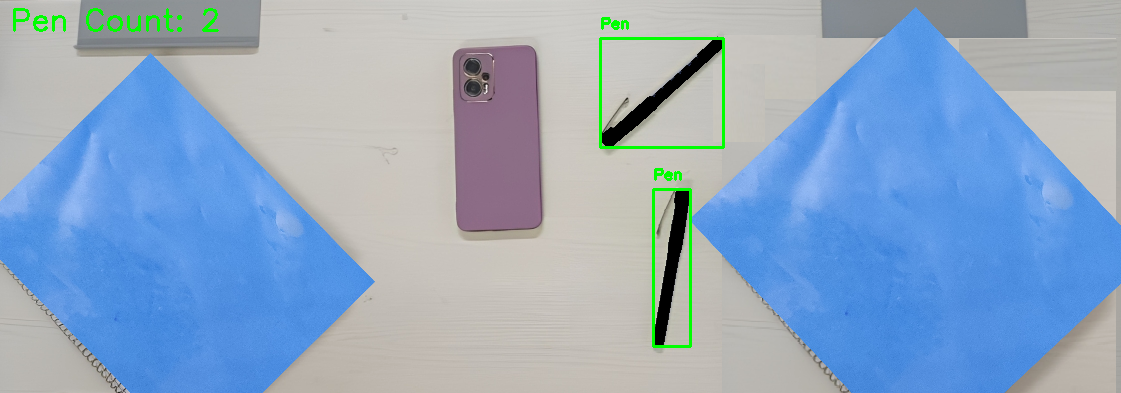

In [102]:
# Load the image
image = cv2.imread('image.png')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges for pens
lower_pens = np.array([0, 0, 0])
upper_pens = np.array([180, 255, 30])

# Create a mask for pens based on the color range
mask_pens = cv2.inRange(hsv_image, lower_pens, upper_pens)

# Apply morphological operations to enhance pen detection
kernel = np.ones((5, 5), np.uint8)
mask_pens = cv2.morphologyEx(mask_pens, cv2.MORPH_OPEN, kernel)

# Find contours in the pen mask
contours_pens, _ = cv2.findContours(mask_pens, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a count for detected pens
pen_count = 0

# Initialize a list to store labels for detected pens
pen_labels = []

# Define the size threshold to filter out small objects
size_threshold = 500

# Draw bounding boxes around the detected pens and label them
for contour in contours_pens:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    if cv2.contourArea(contour) > size_threshold and aspect_ratio < 3:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        label = "Pen"
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        pen_labels.append(label)
        pen_count += 1

# Display the image with bounding boxes around pens and their labels
cv2.putText(image, f"Pen Count: {pen_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2_imshow(image)

cv2.waitKey(0)
cv2.destroyAllWindows()


## **Book Detection**

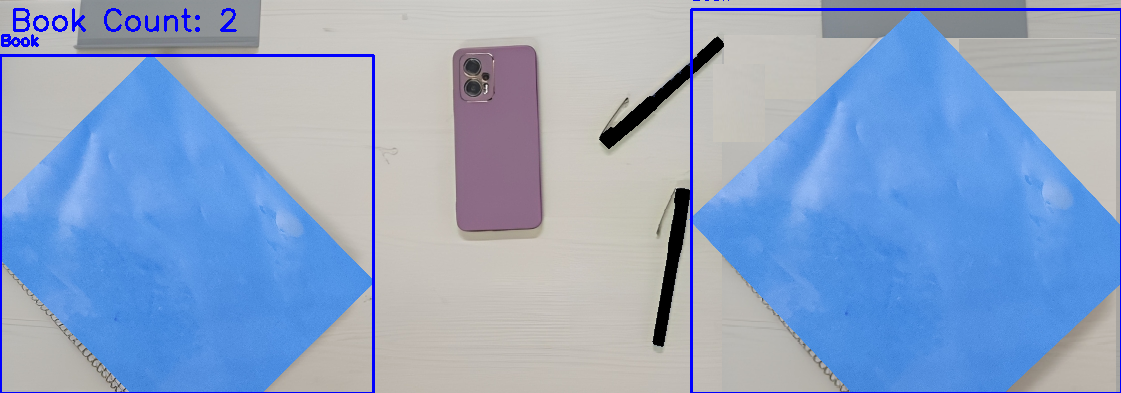

In [103]:
# Load the image
image = cv2.imread('image.png')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges for books
lower_books = [np.array([100, 50, 50]), np.array([130, 255, 255])]
upper_books = [np.array([140, 255, 255]), np.array([180, 255, 255])]

# Initialize an empty mask for books
mask_books = np.zeros_like(mask_pens)

# Combine the masks for multiple book thresholds
for i in range(len(lower_books)):
    mask_books_i = cv2.inRange(hsv_image, lower_books[i], upper_books[i])
    mask_books = cv2.bitwise_or(mask_books, mask_books_i)

# Apply morphological operations to enhance object detection for all objects
kernel = np.ones((5, 5), np.uint8)
mask_books = cv2.morphologyEx(mask_books, cv2.MORPH_OPEN, kernel)

# Find contours in the masks
contours_books, _ = cv2.findContours(mask_books, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a count for detected books
book_count = 0

# Initialize a list to store labels for detected books
book_labels = []

# Draw bounding boxes around the detected objects
for contour in contours_books:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    if cv2.contourArea(contour) > 300 and aspect_ratio < 3:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        label = "Book"
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        book_labels.append(label)
        book_count += 1

# Display the count of detected books and image with bounding boxes
cv2.putText(image, f"Book Count: {book_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
cv2_imshow(image)
